In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [3]:
datos = load_digits()

In [22]:
datos.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

<Figure size 640x480 with 0 Axes>

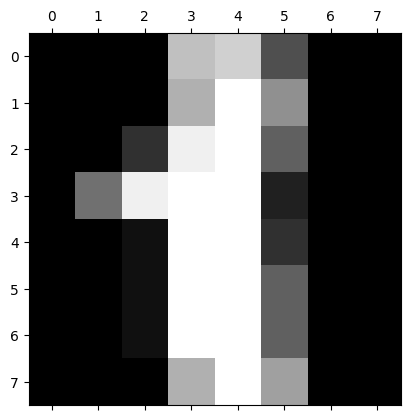

In [17]:
plt.gray()
plt.matshow(datos.images[1])

In [25]:
x = datos.data
Y = datos.target

In [23]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x,Y,test_size=0.33,random_state=42)


In [27]:
modelo_neuronal = Perceptron(verbose=True)

In [28]:
modelo_neuronal.fit(X_train,y_train)

-- Epoch 1
Norm: 263.17, NNZs: 53, Bias: -2.000000, T: 1203, Avg. loss: 19.410640
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 315.95, NNZs: 53, Bias: -3.000000, T: 2406, Avg. loss: 5.163757
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 350.74, NNZs: 53, Bias: -3.000000, T: 3609, Avg. loss: 2.545303
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 358.31, NNZs: 54, Bias: -3.000000, T: 4812, Avg. loss: 0.899418
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 371.14, NNZs: 53, Bias: -3.000000, T: 6015, Avg. loss: 2.399834
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 371.14, NNZs: 53, Bias: -3.000000, T: 7218, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 371.14, NNZs: 53, Bias: -3.000000, T: 8421, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 371.14, NNZs: 53, Bias: -3.000000, T: 9624, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 371.14, NNZs: 53, Bias: -3.000000, T: 10827, Avg. loss

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


Perceptron(verbose=True)

In [31]:
modelo_neuronal.score(X_test,y_test)

0.9579124579124579

In [34]:
modelo_neuronal.predict(datos.data[800:801])

array([4])

In [35]:
from sklearn.neural_network import MLPClassifier

In [36]:
red_neuronal = MLPClassifier(hidden_layer_sizes=((100,100,30)),activation="logistic")

In [37]:
red_neuronal.fit(X_train,y_train)

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 100, 30))

In [38]:
red_neuronal.score(X_train,y_train)

1.0

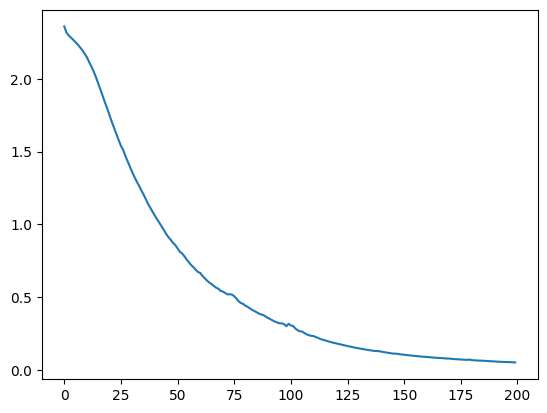

In [41]:
plt.plot(red_neuronal.loss_curve_)

In [42]:
from sklearn.model_selection import GridSearchCV

In [49]:
hiperparametros = {"hidden_layer_sizes":[(1),(1,1),(5,5,5),(100),(100,100,30)],
                   "max_iter":[1,10,200,500]}

In [50]:
optimization= GridSearchCV(estimator = MLPClassifier(),param_grid= hiperparametros)

In [51]:
optimization.fit(X_train,y_train)

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Usuario

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [1, (1, 1), (5, 5, 5), 100,
                                                (100, 100, 30)],
                         'max_iter': [1, 10, 200, 500]})

In [53]:
optimization.score(X_train,y_train)

1.0